In [88]:
from google.colab import drive
from os import chdir
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
chdir('/content/gdrive/My Drive/Colab Notebooks/Computational Methods/Ex07')

In [90]:
#7.1

import pandas as pd

file_name = "exoplanet.eu_catalog_25-11-25.csv"

df = pd.read_csv(file_name, sep=';')

print(df)

# Checking the mass of the second planet
print(f"\nMass of the second planet is: {df.loc[1, 'mass']}")

         mass  mass_error_min  mass_error_max    radius  radius_error_min  \
0    0.060420        0.060420        0.095400  0.684432           0.03696   
1    0.066780        0.038160        0.060420  0.526400           0.03360   
2    0.289380        0.111300        0.168540  0.705600           0.08960   
3    0.331038        0.048972        0.055968  0.754880           0.03360   
4    0.391140        0.391140        0.429300  0.940240           0.05040   
..        ...             ...             ...       ...               ...   
224  9.005760        0.298920        0.298920  1.904000           0.20160   
225  9.393720        1.771260        1.771260  1.590400           0.02240   
226  9.415980        2.862000        2.862000  1.628480           0.06944   
227  9.676740        0.795000        0.795000  1.928640           0.10080   
228  9.956580        1.303800        1.361040  1.789536           0.07952   

     radius_error_max  
0             0.03696  
1             0.03360  
2  

In [91]:
#7.2

import math
#density = M/((4/3)* math.pi* R**3)
#Calculating density and adding to the table
df["density"]=df["mass"]/(4/3)*math.pi* df["radius"]**3
print(df)
print(df["density"])


         mass  mass_error_min  mass_error_max    radius  radius_error_min  \
0    0.060420        0.060420        0.095400  0.684432           0.03696   
1    0.066780        0.038160        0.060420  0.526400           0.03360   
2    0.289380        0.111300        0.168540  0.705600           0.08960   
3    0.331038        0.048972        0.055968  0.754880           0.03360   
4    0.391140        0.391140        0.429300  0.940240           0.05040   
..        ...             ...             ...       ...               ...   
224  9.005760        0.298920        0.298920  1.904000           0.20160   
225  9.393720        1.771260        1.771260  1.590400           0.02240   
226  9.415980        2.862000        2.862000  1.628480           0.06944   
227  9.676740        0.795000        0.795000  1.928640           0.10080   
228  9.956580        1.303800        1.361040  1.789536           0.07952   

     radius_error_max     density  
0             0.03696    0.045644  
1  

The densities seem to be reasonable for some of the exoplanets but for some they are ubrealistaically high which could point to outliers in the data.


Number of potential outliers (density > 10): 157
First 10 values of the boolean outlier vector:
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: density, dtype: bool


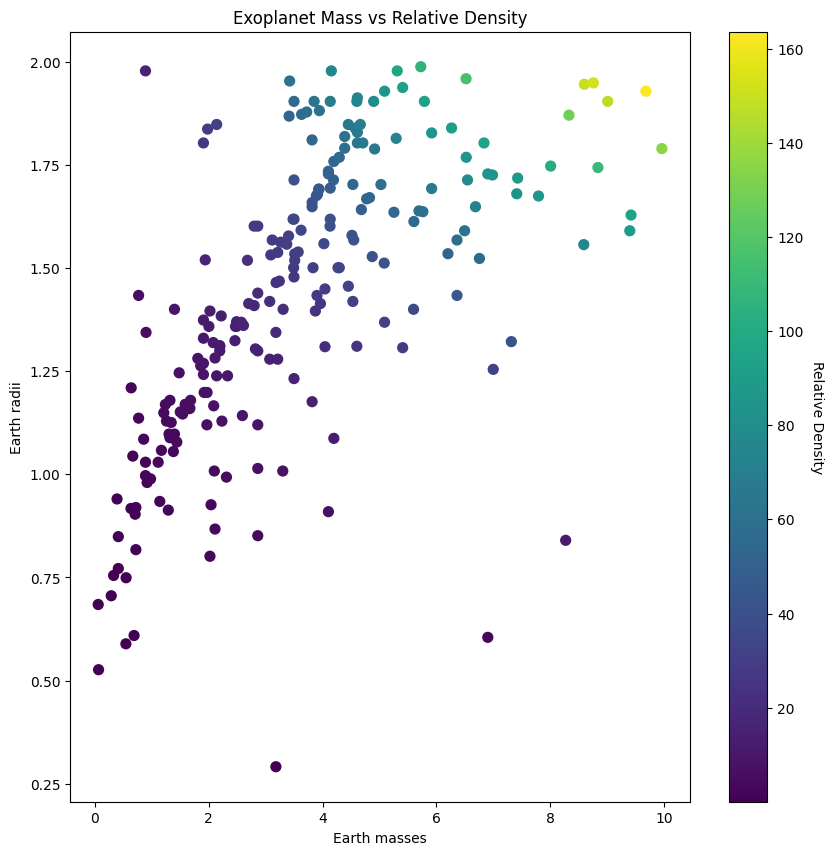

In [96]:
#7.3

import pandas as pd
import math
import matplotlib.pyplot as plt

file_name = "exoplanet.eu_catalog_25-11-25.csv"
df = pd.read_csv(file_name, sep=';')
df["density"] = df["mass"] / (4/3) * math.pi * df["radius"]**3

# 1. Create the scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(df['mass'], df['radius'],
                      c=df['density'], cmap='viridis', s=50)

cbar = plt.colorbar(scatter)
cbar.set_label('Relative Density', rotation=270, labelpad=15)

plt.xlabel('Earth masses')
plt.ylabel('Earth radii')
plt.title('Exoplanet Mass vs Relative Density')

# 2. Create the boolean vector for outliers
outlier_density_high_threshold = 10
outlier_density_low_threshold = 0.1


outlier_vector = (df['density'] > outlier_density_high_threshold)


print(f"\nNumber of potential outliers (density > {outlier_density_high_threshold}): {outlier_vector.sum()}")
print("First 10 values of the boolean outlier vector:")
print(outlier_vector.head(10))


Number of potential outliers (density > 10): 1
First 10 values of the boolean outlier vector:
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: density, dtype: bool


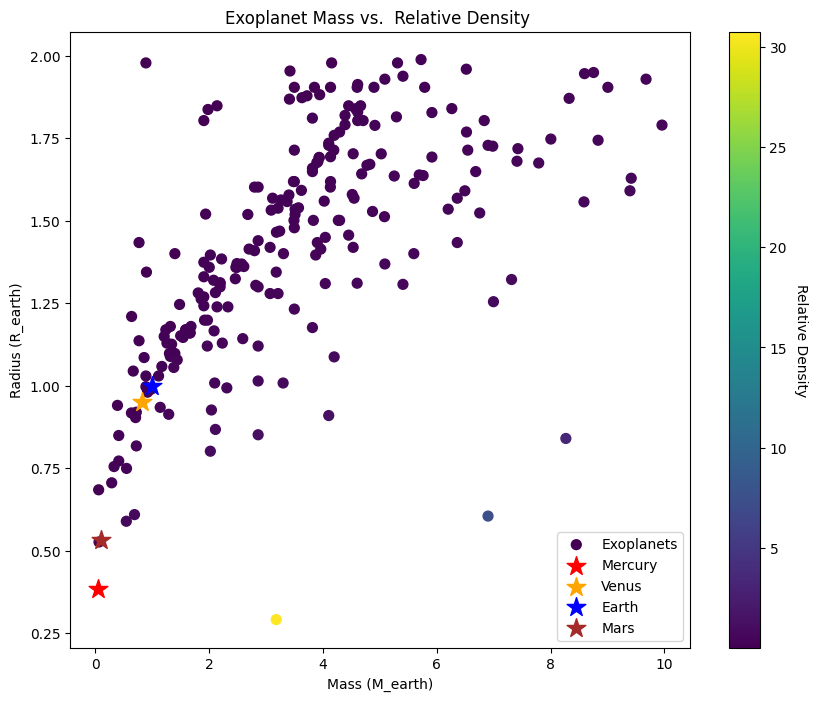

In [93]:
#7.4

import pandas as pd
import math
import matplotlib.pyplot as plt

file_name = "exoplanet.eu_catalog_25-11-25.csv"
df = pd.read_csv(file_name, sep=';')

# Density formula
df["density"] = df["mass"] / ((4/3) * math.pi * df["radius"]**3)


# Creating scatter plot

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['mass'], df['radius'],
                      c=df['density'], cmap='viridis', s=50, label='Exoplanets')
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Density', rotation=270, labelpad=15)

# Defining the planets to be used
terrestrial_planets = [
    {"name": "Mercury", "mass": 0.055, "radius": 0.383, "color": "red"},
    {"name": "Venus", "mass": 0.815, "radius": 0.95, "color": "orange"},
    {"name": "Earth", "mass": 1.0, "radius": 1.0, "color": "blue"},
    {"name": "Mars", "mass": 0.107, "radius": 0.532, "color": "brown"}
]

# Plotting the planets with different symbols
for planet in terrestrial_planets:
    mass = planet["mass"]
    radius = planet["radius"]
    # Calculate density for the terrestrial planet using the corrected formula
    density = mass / ((4/3) * math.pi * radius**3)
    plt.scatter(mass, radius, color=planet["color"], s=200, marker='*', label=planet["name"])

plt.xlabel('Mass (M_earth)')
plt.ylabel('Radius (R_earth)')
plt.title('Exoplanet Mass vs.  Relative Density ')

plt.legend()

# 2. Creating the boolean vector for outliers
outlier_density_high_threshold = 10

outlier_vector = (df['density'] > outlier_density_high_threshold)


print(f"\nNumber of potential outliers (density > {outlier_density_high_threshold}): {outlier_vector.sum()}")
print("First 10 values of the boolean outlier vector:")
print(outlier_vector.head(10))

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


Plot with error bars saved as 'exoplanet_mass_radius_density_errorbars_log_scale.png'.

Number of potential outliers (density > 10): 1
First 10 values of the boolean outlier vector:
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: density, dtype: bool


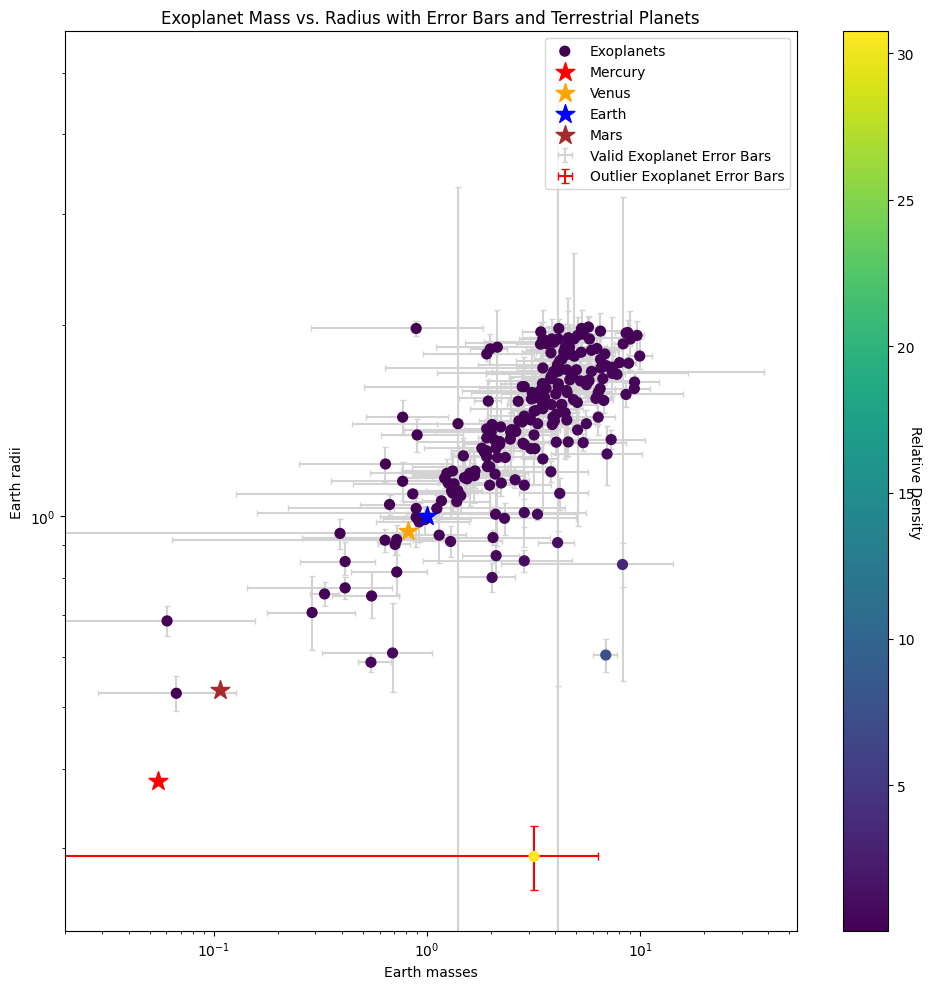

In [95]:
#7.5

import pandas as pd
import math
import matplotlib.pyplot as plt

file_name = "exoplanet.eu_catalog_25-11-25.csv"
df = pd.read_csv(file_name, sep=';')
df["density"] = df["mass"] / ((4/3) * math.pi * df["radius"]**3)

# Define thresholds for 'outliers'
outlier_density_high_threshold = 10

# Creating the boolean vector for outliers
outlier_vector = (df['density'] > outlier_density_high_threshold)

# Separating data into valid and outlier groups
df_valid = df[~outlier_vector]
df_outliers = df[outlier_vector]

#  Plotting with Error Bars
plt.figure(figsize=(10, 10))

plt.errorbar(df_valid['mass'], df_valid['radius'],
             xerr=[df_valid['mass_error_min'], df_valid['mass_error_max']],
             yerr=[df_valid['radius_error_min'], df_valid['radius_error_max']],
             fmt='none', ecolor='lightgray', capsize=2, label='Valid Exoplanet Error Bars')

# Plotting error bars for outlier planets
plt.errorbar(df_outliers['mass'], df_outliers['radius'],
             xerr=[df_outliers['mass_error_min'], df_outliers['mass_error_max']],
             yerr=[df_outliers['radius_error_min'], df_outliers['radius_error_max']],
             fmt='none', ecolor='red', capsize=3, label='Outlier Exoplanet Error Bars')

# Plotting scatter points for exoplanets
scatter = plt.scatter(df['mass'], df['radius'],
                      c=df['density'], cmap='viridis', s=50, zorder=2, label='Exoplanets')
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Density', rotation=270, labelpad=5)

# Defining terrestrial planets data
terrestrial_planets = [
    {"name": "Mercury", "mass": 0.055, "radius": 0.383, "color": "red"},
    {"name": "Venus", "mass": 0.815, "radius": 0.95, "color": "orange"},
    {"name": "Earth", "mass": 1.0, "radius": 1.0, "color": "blue"},
    {"name": "Mars", "mass": 0.107, "radius": 0.532, "color": "brown"}
]

# Plotting terrestrial planets
for planet in terrestrial_planets:
    mass = planet["mass"]
    radius = planet["radius"]
    density = mass / ((4/3) * math.pi * radius**3)
    plt.scatter(mass, radius, color=planet["color"], s=200, marker='*', label=planet["name"], zorder=3) # zorder to ensure it's on top

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Earth masses')
plt.ylabel('Earth radii')
plt.title('Exoplanet Mass vs. Radius with Error Bars and Terrestrial Planets')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()

print("Plot with error bars saved as 'exoplanet_mass_radius_density_errorbars_log_scale.png'.")

print(f"\nNumber of potential outliers (density > {outlier_density_high_threshold}): {outlier_vector.sum()}")
print("First 10 values of the boolean outlier vector:")
print(outlier_vector.head(10))